In [1]:
import pandas as pd
import numpy as np
df_16 = pd.read_csv('mental-health-in-tech-2016/mental-heath-in-tech-2016_20161114.csv', header=0)

## Data cleaning for df_16

In [2]:
df_16.head(10)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,0,More than 1000,1.0,NaN,Yes,I am not sure,No,Yes,Yes,Somewhat easy,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes
6,0,26-100,1.0,NaN,I don't know,No,No,No,I don't know,Somewhat easy,...,Not applicable to me,Not applicable to me,30,M,United States of America,Tennessee,United States of America,Tennessee,Back-end Developer,Sometimes
7,0,More than 1000,1.0,NaN,Yes,Yes,No,Yes,Yes,Very easy,...,Sometimes,Often,37,female,United States of America,Virginia,United States of America,Virginia,Dev Evangelist/Advocate|Back-end Developer,Always
8,0,26-100,0.0,1.0,I don't know,No,No,No,I don't know,Very difficult,...,Rarely,Often,44,Female,United States of America,California,United States of America,California,Support|Back-end Developer|One-person shop,Sometimes
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Rarely,Often,30,Male,United States of America,Kentucky,United States of America,Kentucky,One-person shop|Front-end Developer|Back-end D...,Always


In [3]:
df_c16 = df_16.copy()

### separate company into 7 levels based on size

In [4]:
def company_level(company_size):
    levels = {
        1: '1-5',
        2: '6-25',
        3: '26-100',
        4: '100-500',
        5: '500-1000',
        6: 'More than 1000'
    }
    result = 0
    for k, v in levels.items():
        if v == company_size:
            result = k
    return result

company_size = df_c16['How many employees does your company or organization have?'].apply(company_level)

In [5]:
df_c16['company_size'] = company_size
df_c16 = df_c16.drop(['How many employees does your company or organization have?'], axis=1)

In [6]:
# fill in NaN for column 'Does your employer provide mental health benefits as part of healthcare coverage?' with 'I don't know'
df_c16['Does your employer provide mental health benefits as part of healthcare coverage?'].fillna("I don't know", inplace=True)

In [7]:
columns = list(df_c16.columns)


In [8]:
df_c16[columns[1]].fillna(9, inplace=True)

In [9]:
df_c16[columns[2]].fillna(9, inplace=True)

In [10]:
df_c16[columns[3]].replace('Not eligible for coverage / N/A', 'No', inplace=True)

In [11]:
# fill NaN for column 'Do you know the options for mental health care available under your employer-provided coverage?'
# with value of 'I am not sure'
df_c16[columns[4]].fillna('I am not sure', inplace=True)

In [12]:
# fill NaN with 'I don't know'
df_c16[columns[5]].fillna("I don't know", inplace=True)

In [13]:
df_c16[columns[6]].fillna("I don't know", inplace=True)

In [14]:
df_c16[columns[7]].fillna("I don't know", inplace=True)

In [15]:
df_c16[columns[8]].fillna("I don't know", inplace=True)

In [16]:
def medical_request_level(request):
    levels = {
        1: 'Very easy',
        2: 'Somewhat easy',
        3: 'Neither easy nor difficult',
        4: 'Somewhat difficult',
        5: 'very difficult'
    }
    result = 0
    for k, v in levels.items():
        if v == request:
            result = k
    return result

requests = df_c16[columns[8]].apply(medical_request_level)



In [17]:
df_c16[columns[8]] = requests

In [18]:
df_c16[columns[9]].fillna('Maybe', inplace=True)

In [19]:
df_c16[columns[10]].fillna('Maybe', inplace=True)

In [20]:
df_c16[columns[11]].fillna('Maybe', inplace=True)

In [21]:
df_c16[columns[12]].fillna('Maybe', inplace=True)

In [22]:
df_c16[columns[13]].fillna("I don't know", inplace=True)

In [23]:
df_c16[columns[14]].fillna("No", inplace=True)

In [24]:
df_c16[columns[15]].fillna(0.0, inplace=True)

In [25]:
df_c16[columns[16]].fillna("No, I don't know any", inplace=True)

In [26]:
df_c16[columns[17]].fillna("Not applicable to me", inplace=True)

In [27]:
df_c16[columns[18]].fillna("I'm not sure", inplace=True)

In [28]:
df_c16[columns[19]].fillna("Not applicable to me", inplace=True)

In [29]:
df_c16[columns[20]].fillna("Not applicable to me", inplace=True)

In [30]:
df_c16[columns[21]].fillna("Yes", inplace=True)

In [31]:
df_c16[columns[22]].fillna("1-25%", inplace=True)

In [32]:
df_c16[columns[24]].fillna("I don't know", inplace=True)

In [33]:
df_c16[columns[25]].fillna("N/A (not currently aware)", inplace=True)

In [34]:
df_c16[columns[26]].fillna("I don't know", inplace=True)

In [35]:
df_c16[columns[27]].fillna("I don't know", inplace=True)

In [36]:
df_c16[columns[28]].fillna("I don't know", inplace=True)

In [37]:
df_c16[columns[29]].fillna("I don't know", inplace=True)

In [38]:
df_c16[columns[30]].fillna("I don't know", inplace=True)

In [39]:
df_c16[columns[31]].fillna("Some of my previous employers", inplace=True)

In [40]:
df_c16[columns[32]].fillna("I don't know", inplace=True)

In [41]:
df_c16[columns[33]].fillna("I don't know", inplace=True)

In [42]:
df_c16[columns[34]].fillna("None of them", inplace=True)

In [43]:
# due to column 36 is explain column 35, information is duplicated. So remove column 36
df_c16 = df_c16.drop([columns[36]], axis=1)

In [44]:
df_c16 = df_c16.drop([columns[38]], axis=1) 

In [45]:
df_c16[columns[39]] = df_c16[columns[39]].replace(['Yes, I think it would', 'Yes, it has'], 'Yes')
df_c16[columns[39]] = df_c16[columns[39]].replace(["No, I don't think it would", "No, it has not"], 'No')

In [46]:
df_c16[columns[40]] = df_c16[columns[40]].replace(["Yes, I think they would", "Yes, they do"], 'Yes')
df_c16[columns[40]] = df_c16[columns[40]].replace(["No, I don't think they would", "No, they do not"], 'No')

In [47]:
df_c16[columns[42]].fillna("Maybe/Not sure", inplace=True)

In [48]:
df_c16[columns[43]].fillna("Maybe", inplace=True)

### column 47, 48 record the mental health diagnositions and conditions.

In [49]:
df_c16 = df_c16.drop([columns[47], columns[48], columns[50]], axis=1)

In [50]:
df_c16[columns[54]].mean()

34.28611304954641

In [51]:
df_c16[columns[54]].replace(323, 32, inplace=True)

In [52]:
df_c16[columns[54]].replace(3, 34, inplace=True)

In [53]:
# clean the genders by grouping the genders into 3 categories: Female, Male, Genderqueer/Other 
# Borrowed from "https://www.kaggle.com/jchen2186/data-visualization-with-python-seaborn"
df_c16[columns[55]] = df_c16[columns[55]].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
df_c16[columns[55]] = df_c16[columns[55]].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
df_c16[columns[55]] = df_c16[columns[55]].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')

# replace the one null with Male, the mode gender, so we don't have to drop the row
df_c16[columns[55]] = df_c16[columns[55]].replace(np.NaN, 'Male')
df_c16[columns[55]].unique()

array(['Male', 'Female', 'Genderqueer/Other'], dtype=object)

In [54]:
df_c16[columns[60]].replace(['Back-end Developer|Front-end Developer', 'Front-end Developer|Back-end Developer'], 'Full track', inplace=True)


In [55]:
# base on the information of column 'Which of the following best describes your work position?' update the data in 
# column 'Is your primary role within your company related to tech/IT?'
tech_list = ['Developer', 'Full Track',' DevOps', 'SysAdmin', 'Designer', 'Dev Evangelist']

df_c16[columns[2]] = np.where((x in df_c16[columns[60]] for x in tech_list) and (df_c16[columns[2]]==9.0), 1.0, 0.0)


## change all data into categorical data type

In [56]:
columns[39]

'Do you feel that being identified as a person with a mental health issue would hurt your career?'

In [57]:
df_c16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 58 columns):
Are you self-employed?                                                                                                                                                              1433 non-null int64
Is your employer primarily a tech company/organization?                                                                                                                             1433 non-null float64
Is your primary role within your company related to tech/IT?                                                                                                                        1433 non-null float64
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                   1433 non-null object
Do you know the options for mental health care available under your employer-provided co

In [58]:
df_c16 = df_c16.apply(lambda x: x.astype('category'))

In [59]:
df_c16['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'].cat.as_ordered()

0       1
1       2
2       3
3       0
4       3
5       2
6       2
7       1
8       0
9       0
10      1
11      4
12      1
13      2
14      1
15      3
16      0
17      0
18      0
19      0
20      1
21      2
22      1
23      4
24      0
25      1
26      0
27      4
28      3
29      2
       ..
1403    4
1404    0
1405    0
1406    4
1407    0
1408    0
1409    3
1410    0
1411    1
1412    3
1413    2
1414    0
1415    0
1416    2
1417    0
1418    3
1419    2
1420    0
1421    1
1422    0
1423    2
1424    4
1425    2
1426    2
1427    2
1428    0
1429    0
1430    4
1431    4
1432    0
dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [60]:
df_c16['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].cat.as_ordered()

0         1-25%
1         1-25%
2         1-25%
3         1-25%
4         1-25%
5         1-25%
6         1-25%
7         1-25%
8         1-25%
9         1-25%
10        1-25%
11        1-25%
12        1-25%
13        1-25%
14        1-25%
15        1-25%
16        1-25%
17        1-25%
18      76-100%
19        1-25%
20        1-25%
21        1-25%
22        1-25%
23        1-25%
24        1-25%
25        1-25%
26        1-25%
27        1-25%
28        1-25%
29        1-25%
         ...   
1403      1-25%
1404     26-50%
1405      1-25%
1406      1-25%
1407      1-25%
1408      1-25%
1409      1-25%
1410      1-25%
1411      1-25%
1412      1-25%
1413      1-25%
1414      1-25%
1415      1-25%
1416      1-25%
1417      1-25%
1418      1-25%
1419      1-25%
1420      1-25%
1421      1-25%
1422      1-25%
1423      1-25%
1424      1-25%
1425      1-25%
1426      1-25%
1427      1-25%
1428      1-25%
1429      1-25%
1430      1-25%
1431      1-25%
1432      1-25%
dtype: category
Categori

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
sns.set_style('whitegrid')

# Mental health in tech career

In [63]:
ph_interview = df_c16['Would you be willing to bring up a physical health issue with a potential employer in an interview?']
mh_interview = df_c16['Would you bring up a mental health issue with a potential employer in an interview?']
mh_career = df_c16['Do you feel that being identified as a person with a mental health issue would hurt your career?']
mh_view_as_negative = df_c16['Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?']


In [64]:
df_career_effect = pd.DataFrame()
df_career_effect['ph_interview'] = ph_interview.value_counts()
df_career_effect['mh_interview'] = mh_interview.value_counts()
df_career_effect['mh_career'] = mh_career.value_counts()
df_career_effect['mh_view_as_negative'] = mh_view_as_negative.value_counts()

In [65]:
df_career_effect


,ph_interview,mh_interview,mh_career,mh_view_as_negative
Maybe,633,438,588,591
No,441,883,177,397
Yes,359,112,668,445


In [66]:
df_career_effect.reset_index()

,index,ph_interview,mh_interview,mh_career,mh_view_as_negative
0,Maybe,633,438,588,591
1,No,441,883,177,397
2,Yes,359,112,668,445


In [67]:
df_career_effect['Answers'] = df_career_effect.index


In [68]:
melted = pd.melt(df_career_effect, id_vars=['Answers'], var_name='type', value_name='frequency')

In [69]:
melted

,Answers,type,frequency
0,Maybe,ph_interview,633
1,No,ph_interview,441
2,Yes,ph_interview,359
3,Maybe,mh_interview,438
4,No,mh_interview,883
5,Yes,mh_interview,112
6,Maybe,mh_career,588
7,No,mh_career,177
8,Yes,mh_career,668
9,Maybe,mh_view_as_negative,591


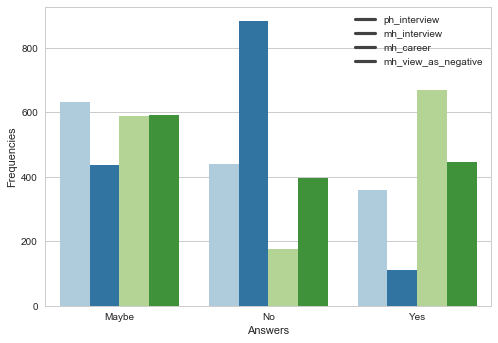

In [70]:
_ = sns.barplot(x='Answers', y='frequency', hue='type', data=melted, palette="Paired")
plt.legend(['ph_interview', 'mh_interview', 'mh_career', 'mh_view_as_negative'])
plt.xlabel('Answers')
plt.ylabel('Frequencies')
plt.show()

### From the plot figure, in contrast to physical health, most people in tech would refute to say mental health problem when being interviewed on job application. And if being identified as a person with mental health issue, most people would feel it will have negative effect on their career. 

# The relation with age, gender, location, company size, self_employed, remote

In [71]:
df_c16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 58 columns):
Are you self-employed?                                                                                                                                                              1433 non-null category
Is your employer primarily a tech company/organization?                                                                                                                             1433 non-null category
Is your primary role within your company related to tech/IT?                                                                                                                        1433 non-null category
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                   1433 non-null category
Do you know the options for mental health care available under your employer-prov

In [72]:
relation = pd.DataFrame()
relation['company_size'] = df_c16['company_size']
relation['age'] = df_c16['What is your age?']
relation['gender'] = df_c16['What is your gender?']
relation['live_country'] = df_c16['What country do you live in?']
relation['live_state'] = df_c16['What US state or territory do you live in?']
relation['work_country'] = df_c16['What country do you work in?']
relation['work_state'] = df_c16['What US state or territory do you work in?']
relation['remote'] = df_c16['Do you work remotely?']
relation['mh_issue'] = df_c16['Do you currently have a mental health disorder?']
relation['diagnosed'] = df_c16['Have you been diagnosed with a mental health condition by a medical professional?']
relation['family_history'] = df_c16['Do you have a family history of mental illness?']
relation['health_benefit'] = df_c16['Does your employer provide mental health benefits as part of healthcare coverage?']
relation['self_employed'] = df_c16['Are you self-employed?']
relation['anonymity_protection'] = df_c16['Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?']

In [73]:
relation.describe()

,company_size,age,gender,live_country,live_state,work_country,work_state,remote,mh_issue,diagnosed,family_history,health_benefit,self_employed,anonymity_protection
count,1433,1433,1433,1433,840,1433,851,1433,1433,1433,1433,1433,1433,1433
unique,7,51,3,53,47,53,48,3,3,2,3,3,2,3
top,3,30,Male,United States of America,California,United States of America,California,Sometimes,Yes,No,Yes,I don't know,0,I don't know
freq,292,94,1061,840,130,851,141,757,575,717,670,606,1146,1029


Because most people were employed not by themself, which is 1146/1433 (80%), and most people don't know whether their MH isuue would be protected as anonymouse (1029/1433 = 72%). We will not consider these two features as useful relation with MH.
So features to be picked up are company size, age, gender, remote, family history, benefit, mh_issue, dagnosed.

In [74]:
relation = relation.drop(['self_employed', 'anonymity_protection'], axis=1)

In [75]:
relation.head(10)

,company_size,age,gender,live_country,live_state,work_country,work_state,remote,mh_issue,diagnosed,family_history,health_benefit
0,3,39,Male,United Kingdom,NaN,United Kingdom,NaN,Sometimes,No,Yes,No,No
1,2,29,Male,United States of America,Illinois,United States of America,Illinois,Never,Yes,Yes,Yes,No
2,2,38,Male,United Kingdom,NaN,United Kingdom,NaN,Always,No,No,No,No
3,0,43,Male,United Kingdom,NaN,United Kingdom,NaN,Sometimes,Yes,Yes,No,I don't know
4,2,43,Female,United States of America,Illinois,United States of America,Illinois,Sometimes,Yes,Yes,Yes,Yes
5,6,42,Male,United Kingdom,NaN,United Kingdom,NaN,Sometimes,Yes,No,No,Yes
6,3,30,Male,United States of America,Tennessee,United States of America,Tennessee,Sometimes,No,No,No,I don't know
7,6,37,Female,United States of America,Virginia,United States of America,Virginia,Always,Yes,Yes,Yes,Yes
8,3,44,Female,United States of America,California,United States of America,California,Sometimes,Yes,Yes,Yes,I don't know
9,0,30,Male,United States of America,Kentucky,United States of America,Kentucky,Always,Yes,Yes,Yes,I don't know


In [76]:
relation.groupby('mh_issue')[['company_size', 'gender', 'work_country', 'remote']].agg(['count'])

,company_size,gender,work_country,remote
,count,count,count,count
mh_issue,,,,
Maybe,327,327,327,327
No,531,531,531,531
Yes,575,575,575,575


In [77]:
df_re = pd.get_dummies(relation, columns=['mh_issue', 'diagnosed', 'family_history'])

In [78]:
df_re

,company_size,age,gender,live_country,live_state,work_country,work_state,remote,health_benefit,mh_issue_Maybe,mh_issue_No,mh_issue_Yes,diagnosed_No,diagnosed_Yes,family_history_I don't know,family_history_No,family_history_Yes
0,3,39,Male,United Kingdom,NaN,United Kingdom,NaN,Sometimes,No,0,1,0,0,1,0,1,0
1,2,29,Male,United States of America,Illinois,United States of America,Illinois,Never,No,0,0,1,0,1,0,0,1
2,2,38,Male,United Kingdom,NaN,United Kingdom,NaN,Always,No,0,1,0,1,0,0,1,0
3,0,43,Male,United Kingdom,NaN,United Kingdom,NaN,Sometimes,I don't know,0,0,1,0,1,0,1,0
4,2,43,Female,United States of America,Illinois,United States of America,Illinois,Sometimes,Yes,0,0,1,0,1,0,0,1
5,6,42,Male,United Kingdom,NaN,United Kingdom,NaN,Sometimes,Yes,0,0,1,1,0,0,1,0
6,3,30,Male,United States of America,Tennessee,United States of America,Tennessee,Sometimes,I don't know,0,1,0,1,0,0,1,0
7,6,37,Female,United States of America,Virginia,United States of America,Virginia,Always,Yes,0,0,1,0,1,0,0,1
8,3,44,Female,United States of America,California,United States of America,California,Sometimes,I don't know,0,0,1,0,1,0,0,1
9,0,30,Male,United States of America,Kentucky,United States of America,Kentucky,Always,I don't know,0,0,1,0,1,0,0,1


In [79]:
re = df_re.groupby('age')[['mh_issue_Yes', 'mh_issue_No', 'diagnosed_Yes', 'diagnosed_No', 'family_history_Yes', 'family_history_No']].agg(['sum'])

In [80]:
re.head(10)

,mh_issue_Yes,mh_issue_No,diagnosed_Yes,diagnosed_No,family_history_Yes,family_history_No
,sum,sum,sum,sum,sum,sum
age,,,,,,
15,0,1,0,1,0,1
17,0,1,0,1,0,1
19,1,2,1,3,0,2
20,1,3,3,3,2,1
21,7,3,8,7,8,4
22,16,11,12,20,15,9
23,11,9,12,12,9,8
24,19,16,20,22,20,16


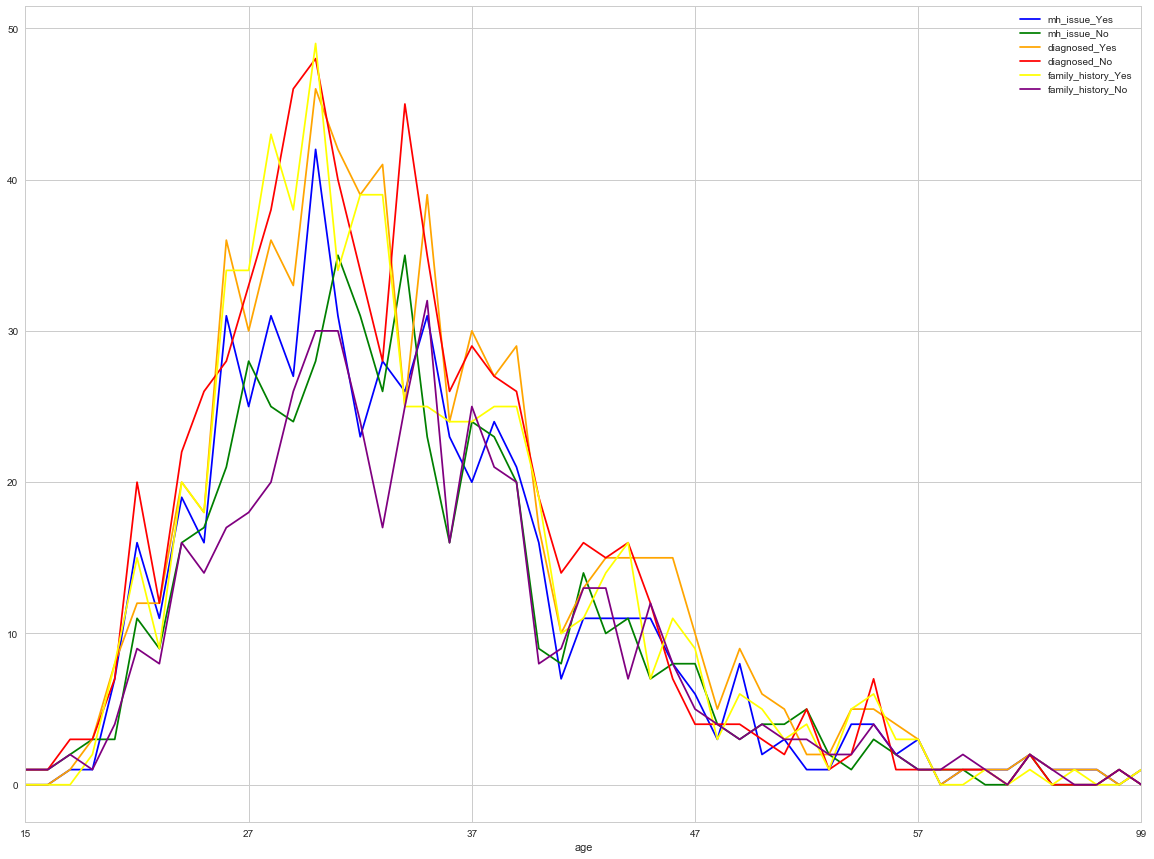

In [81]:
_ = plt.subplots(figsize=(20, 15))
re['mh_issue_Yes']['sum'].plot(color='blue')
re['mh_issue_No']['sum'].plot(color='green')
re['diagnosed_Yes']['sum'].plot(color='orange')
re['diagnosed_No']['sum'].plot(color='red')
re['family_history_Yes']['sum'].plot(color='yellow')
re['family_history_No']['sum'].plot(color='purple')
plt.legend(['mh_issue_Yes', 'mh_issue_No', 'diagnosed_Yes', 'diagnosed_No', 'family_history_Yes', 'family_history_No'])
plt.show()

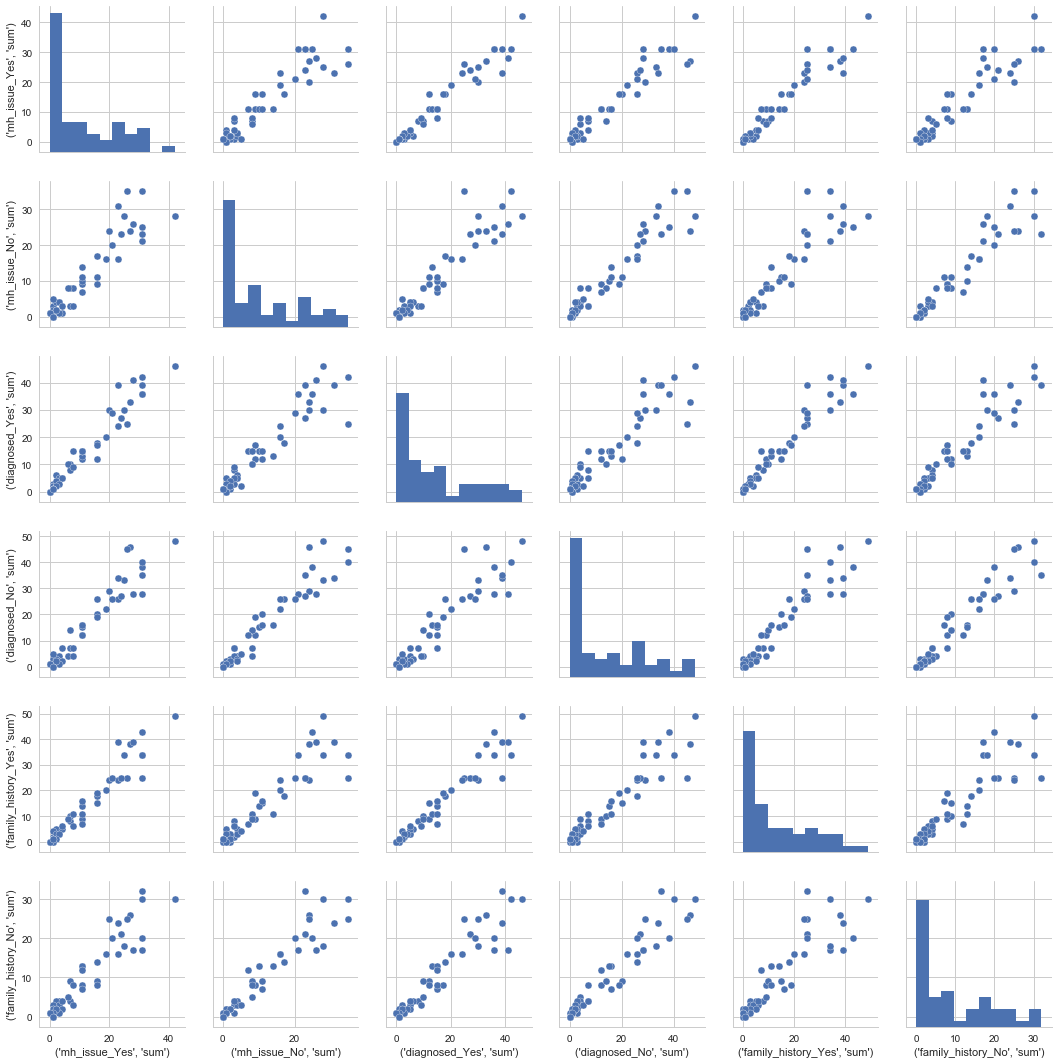

In [82]:
sns.pairplot(data=re)
plt.show()

### All three features of mental health current issue, whether or not being diagnosed with MH problem, and whether have family history show linear related, they have almost the same distribution. So whether or not being diagnosed with MH problem is picked up as mental health issue representation.

## mental health issue (diagnosed) with company size, age, gender, remote and benefit relationship

In [83]:
df_re['remote'].value_counts()

Sometimes    757
Always       343
Never        333
Name: remote, dtype: int64

In [84]:
df_re2 = pd.DataFrame()
df_re2['age'] = relation['age']
df_re2['diagnosed'] = relation['diagnosed']
df_re2['company_size'] = relation['company_size']
df_re2['gender'] = relation['gender']
df_re2['remote'] = relation['remote']
df_re2['benefit'] = relation['health_benefit']

In [85]:
df_re2.head()

,age,diagnosed,company_size,gender,remote,benefit
0,39,Yes,3,Male,Sometimes,No
1,29,Yes,2,Male,Never,No
2,38,No,2,Male,Always,No
3,43,Yes,0,Male,Sometimes,I don't know
4,43,Yes,2,Female,Sometimes,Yes


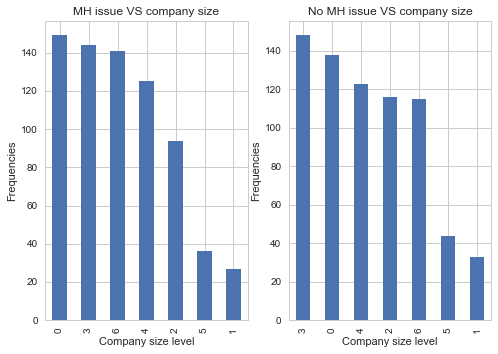

In [86]:
plt.subplot(1, 2, 1)
df_re2[df_re2['diagnosed'] == 'Yes']['company_size'].value_counts().plot(kind='bar')
plt.xlabel('Company size level')
plt.ylabel('Frequencies')
plt.title('MH issue VS company size')
plt.subplot(1, 2, 2)
df_re2[df_re2['diagnosed'] == 'No']['company_size'].value_counts().plot(kind='bar')
plt.xlabel('Company size level')
plt.ylabel('Frequencies')
plt.title('No MH issue VS company size')
plt.show()

### Since the sample size is almost equal distributed in different company size, and company_size in group 5 and 1 have small counts, which means the survey sample only cover very limited samples in these group. So the company size didn't show much significant relationship with mental health.

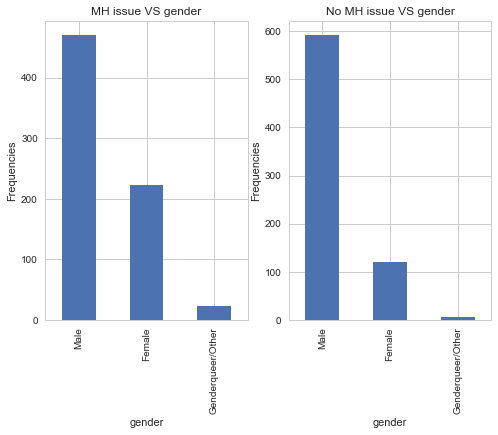

In [87]:
plt.subplot(1, 2, 1)
df_re2[df_re2['diagnosed'] == 'Yes']['gender'].value_counts().plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('Frequencies')
plt.title('MH issue VS gender')
plt.subplot(1, 2, 2)
df_re2[df_re2['diagnosed'] == 'No']['gender'].value_counts().plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('Frequencies')
plt.title('No MH issue VS gender')
plt.show()

### The size of female suffering from mental health issue is "doubled" compared with no mental health issue. While male seems much more equal distributed.

In [88]:
gender_dist = pd.DataFrame(df_re2.groupby('company_size')['gender'].value_counts())

In [89]:
gender_dist['counts'] = gender_dist['gender']
gender_dist = gender_dist.drop('gender', axis=1)

In [90]:
gender_dist.reset_index(inplace=True)

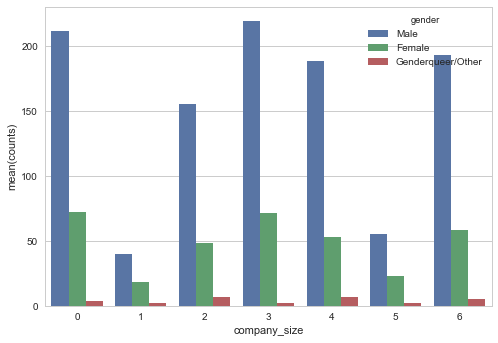

In [91]:

_ = sns.barplot(x='company_size', y='counts', hue='gender', data=gender_dist)
plt.show()

### Usually the number of female in tech is around one third of male's. And it has the same distribution with male's. 

In [105]:
diagnosed_remote = pd.DataFrame(df_re2.groupby('diagnosed')['remote'].value_counts())
diagnosed_remote['counts'] = diagnosed_remote['remote']
diagnosed_remote = diagnosed_remote.drop(['remote'], axis=1)
diagnosed_remote.reset_index(inplace=True)

In [106]:
diagnosed_remote

,diagnosed,remote,counts
0,No,Sometimes,364
1,No,Never,181
2,No,Always,172
3,Yes,Sometimes,393
4,Yes,Always,171
5,Yes,Never,152


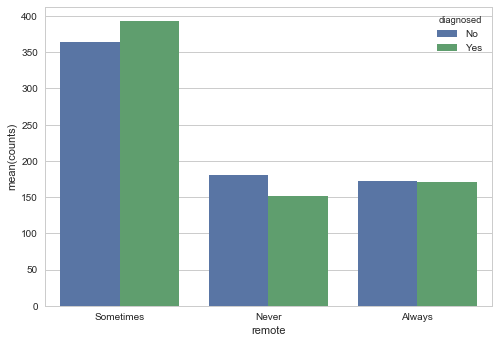

In [107]:
_ = sns.barplot(x='remote', y='counts', hue='diagnosed', data=diagnosed_remote)
plt.show()

### There is almost no different between with MH issue and without MH issue.

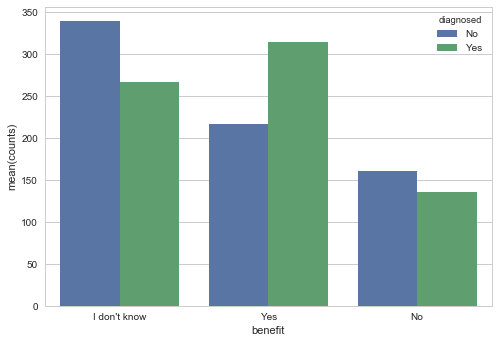

In [111]:
diagnosed_benefit = pd.DataFrame(df_re2.groupby('diagnosed')['benefit'].value_counts())
diagnosed_benefit['counts'] = diagnosed_benefit['benefit']
diagnosed_benefit = diagnosed_benefit.drop(['benefit'], axis=1)
diagnosed_benefit.reset_index(inplace=True)

_ = sns.barplot(x='benefit', y='counts', hue='diagnosed', data=diagnosed_benefit)
plt.show()

### In None MH issue group, there is still about 50% of people who don't know whether they should have mental health benefit covered by the company.

In [98]:
df_re2.columns

Index(['age', 'diagnosed', 'company_size', 'gender', 'remote', 'benefit'], dtype='object')

In [100]:
df_re2_dummy = pd.get_dummies(df_re2, columns=['diagnosed', 'gender', 'remote', 'benefit'])

In [112]:
df_re2_dummy.head()

,age,company_size,diagnosed_No,diagnosed_Yes,gender_Female,gender_Genderqueer/Other,gender_Male,remote_Always,remote_Never,remote_Sometimes,benefit_I don't know,benefit_No,benefit_Yes
0,39,3,0,1,0,0,1,0,0,1,0,1,0
1,29,2,0,1,0,0,1,0,1,0,0,1,0
2,38,2,1,0,0,0,1,1,0,0,0,1,0
3,43,0,0,1,0,0,1,0,0,1,1,0,0
4,43,2,0,1,1,0,0,0,0,1,0,0,1


In [114]:
df_re2_sum = df_re2_dummy.groupby(['age', 'company_size'])[['diagnosed_No', 'diagnosed_Yes', 'gender_Female', 'gender_Genderqueer/Other', 'gender_Male', 'remote_Always','remote_Never','remote_Sometimes', "benefit_I don't know", 'benefit_No', 'benefit_Yes']].agg(['sum'])

In [115]:
df_re2_sum.reset_index(inplace=True)

In [116]:
df_re2_sum.head(10)

,age,company_size,diagnosed_No,diagnosed_Yes,gender_Female,gender_Genderqueer/Other,gender_Male,remote_Always,remote_Never,remote_Sometimes,benefit_I don't know,benefit_No,benefit_Yes
,,,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
0,15,0,1,0,0,0,1,0,0,1,1,0,0
1,17,2,1,0,0,0,1,1,0,0,0,1,0
2,19,0,1,1,0,0,2,0,1,1,2,0,0
3,19,2,1,0,0,0,1,1,0,0,0,1,0
4,19,6,1,0,1,0,0,0,1,0,0,0,1
5,20,0,0,1,0,0,1,0,0,1,1,0,0
6,20,2,2,2,1,1,2,1,2,1,1,1,2
7,20,6,1,0,0,0,1,0,0,1,0,1,0
8,21,0,2,0,0,0,2,1,0,1,2,0,0


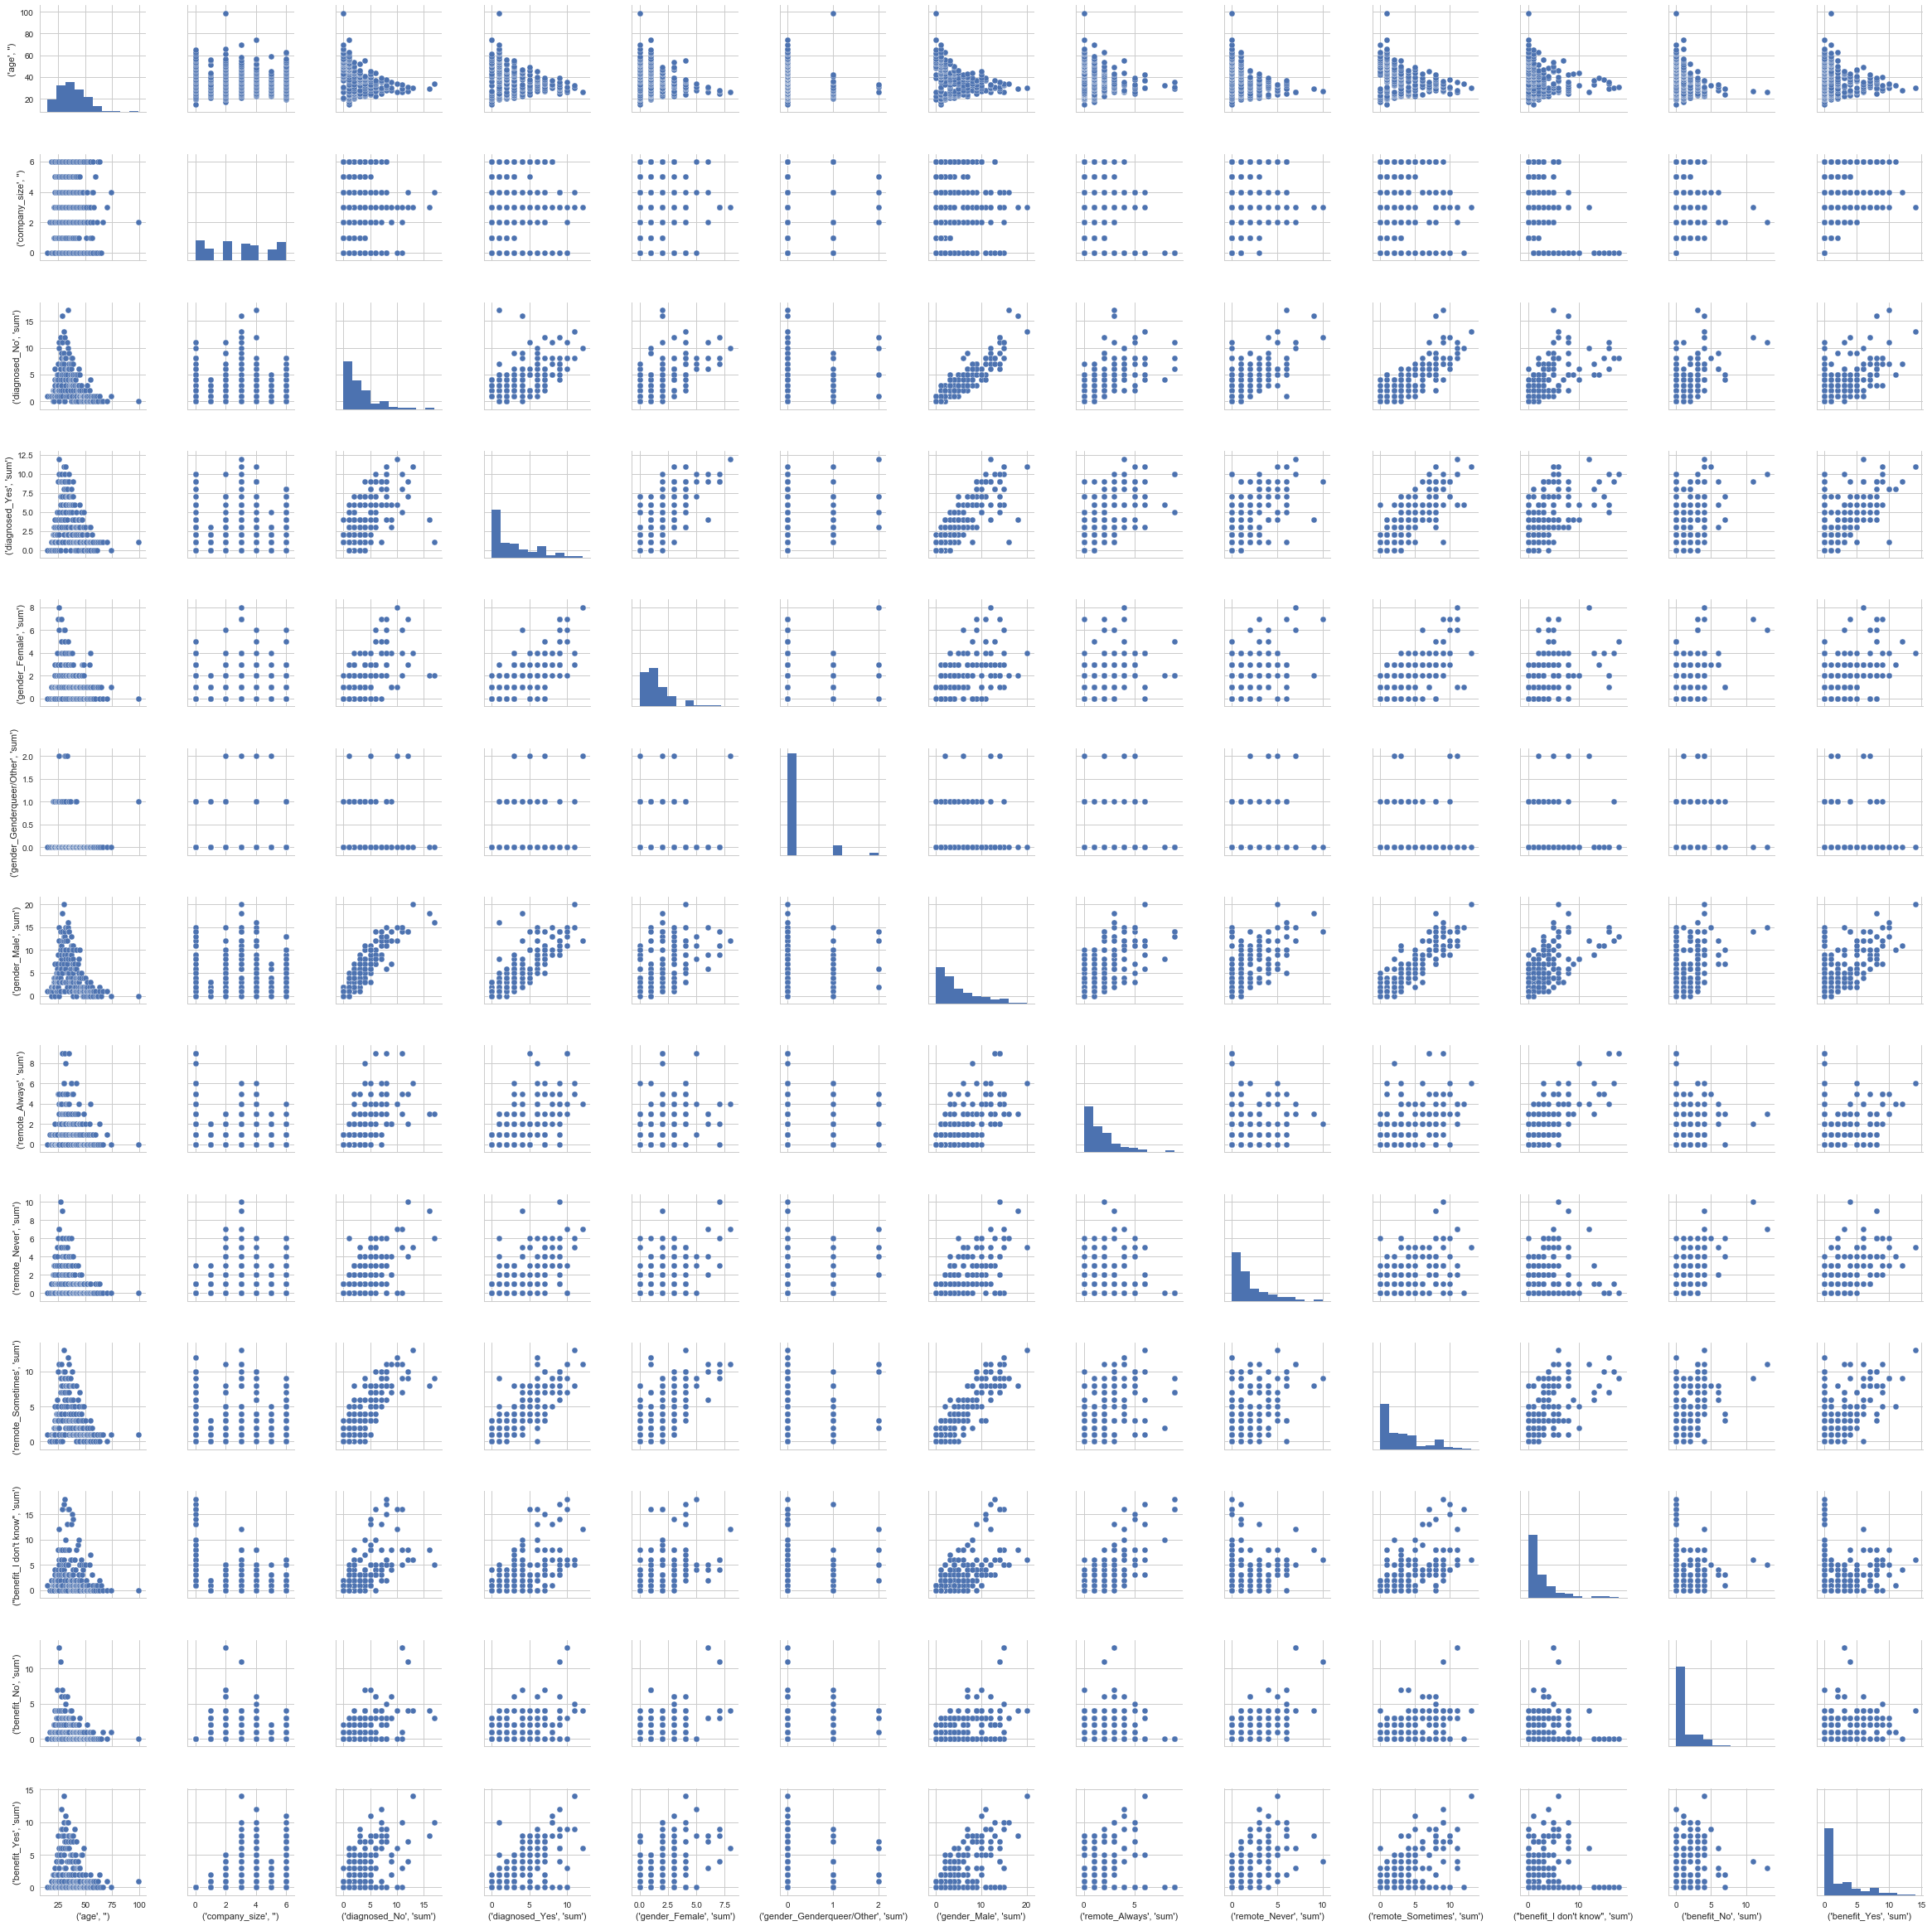

In [117]:
_ = sns.pairplot(df_re2_sum)
plt.show()